In [1]:
import matplotlib.pyplot as plt
import numpy as np

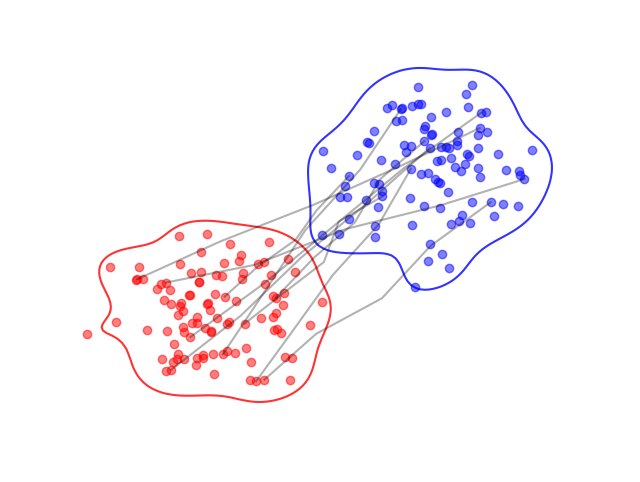

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

random_lines = True

np.random.seed(20)

scale=0.5
x1 = np.random.normal(loc=1, scale=scale, size=(100, 2))  # Cluster 1
x2 = np.random.normal(loc=-1, scale=scale, size=(100, 2))  # Cluster 2

plt.figure(figsize=(8, 6))

kde1 = gaussian_kde(x1.T)
x1_min, x1_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y1_min, y1_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
x1_grid, y1_grid = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(y1_min, y1_max, 100))
z1 = kde1(np.vstack([x1_grid.ravel(), y1_grid.ravel()])).reshape(x1_grid.shape)
plt.contour(x1_grid, y1_grid, z1, levels=[z1.max() * 0.1], colors='blue', alpha=0.8)
plt.scatter(x1[:, 0], x1[:, 1], color='blue', alpha=0.5, label='Cluster 1')

kde2 = gaussian_kde(x2.T)
x2_min, x2_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y2_min, y2_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1
x2_grid, y2_grid = np.meshgrid(np.linspace(x2_min, x2_max, 100), np.linspace(y2_min, y2_max, 100))
z2 = kde2(np.vstack([x2_grid.ravel(), y2_grid.ravel()])).reshape(x2_grid.shape)
plt.contour(x2_grid, y2_grid, z2, levels=[z2.max() * 0.1], colors='red', alpha=0.8)
plt.scatter(x2[:, 0], x2[:, 1], color='red', alpha=0.5, label='Cluster 2')

num_lines = 10
trajectory_length = 5
indices = np.random.choice(len(x1), num_lines, replace=False)

for i in indices:
    if random_lines:
        point1 = x1[i]
        point2 = x2[i]
    else:
        point1 = x2[i]
        length = 2.4
        point2 = point1 + length * np.ones(2)
    trajectory = [point1 * (1 -t) + point2 * t for t in np.linspace(0, 1, trajectory_length)]
    trajectory = np.array(trajectory)
    noise = np.random.normal(0, 0.05, trajectory.shape)
    noise[0, :] = 0
    noise[-1, :] = 0
    trajectory += noise
    plt.plot(trajectory[:, 0], trajectory[:, 1], color='black', alpha=0.3)

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axis('off')
plt.savefig(f'figures/trajectories_{random_lines}.png', bbox_inches='tight', dpi=300)
plt.show()